In [1]:
# import statements
import pandas as pd
from pandas import Series, DataFrame
# the statistics module is useful for basic descriptive stats 
# such as standard deviation and variance, etc.
import statistics
# import scatter plot module
import matplotlib.pyplot as plt
# numpy installs many scientific stat tools, we need it for sklearn
import numpy as np
import sqlite3
import os
import matplotlib
# new import statement
from matplotlib import pyplot as plt
matplotlib.rcParams["font.size"] = 16
#allow creation of db file
from pathlib import Path


# Exploring media use and science opinions via the General Social Survey 
Sam Griffin  
Final project CS319  
Fall 2022  

## About the Dataset

Established in 1972, the General Social Survey (GSS) seeks to capture biannual, cross-sectional sociological data to help explain trends in American attitudes, behavior, and opinion formation. The GSS is administered form the National Opinion Research Center at the University of Chicago, which allows the data to be accessed as open source. Respondents are required to be over the age of 18 and have a residence within the United States. The GSS aims to represent a diversity of geographic distribution within their study (rural, suburban, urban); data is collected in 90-minute, face-to-face interviews.

The survey features a battery that collects exhaustive demographic information (age, race, number of children, weight, etc.), social network information such as number of contacts an individual knows in various professions (lawyer, doctor, teacher, plumber, etc.), and questions about trust in various institutions, religiosity, social media usage, etc for a total of over 1000 variables collected per year. In general, the GSS asks many of the same questions yearly, making it a useful longitudinal instrument. There are, however, occasional additions to the GSS captured on a less frequent basis known as modules (e.g. a social media use module was added in 2016 in response to the rise of social media platforms).

Analysis will focus on two years:

- 2018, featuring a in-depth module on social media usage (1065 variables, 2348 responses)
- 2021, the most recently published GSS data (special year, remote interviews, 737 variables, 8,000 resonses). NOTE: the 2021 GSS methodology was signficantly different, no interviews, self conducted surveys = more respondents, but less complete responses.

Hope to look at differences in trust of science before and after covid, and cross-sectional social media usage in the 2018 dataset.


# Import the 2018 GSS data

In [2]:
# import the dataset as a pandas DataFrame
df = pd.read_csv("GSS2018.csv")
df

,ABANY,ABDEFECT,ABFELEGL,ABHELP1,ABHELP2,ABHELP3,ABHELP4,ABHLTH,ABINSPAY,ABMEDGOV1,...,XMARSEX,XMARSEX1,XMOVIE,XNORCSIZ,YEAR,YEARSJOB,YEARSUSA,YEARVAL,YOUSUP,ZODIAC
0,2,1,0,1,1,1,1,1,1,2,...,1,1,0,6,2018,1.0,-1,-1.0,45,6
1,1,1,3,2,2,2,2,1,2,0,...,1,0,2,6,2018,-1.0,-1,-1.0,0,11
2,0,0,0,1,2,1,1,0,2,1,...,0,1,2,6,2018,15.0,-1,-1.0,3,1
3,0,0,1,1,1,1,1,0,1,0,...,0,0,2,6,2018,25.0,-1,-1.0,10,1
4,2,1,0,2,2,2,1,1,2,0,...,1,0,2,6,2018,-1.0,-1,-1.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2343,1,1,3,9,9,9,9,1,9,9,...,1,1,0,10,2018,2.0,-1,-1.0,0,5
2344,2,1,3,1,2,1,1,1,1,1,...,1,1,0,10,2018,2.0,-1,-1.0,1,9
2345,2,1,3,1,2,2,1,1,1,0,...,1,0,2,10,2018,-1.0,-1,-1.0,0,99
2346,0,0,0,2,2,2,1,0,1,1,...,0,1,2,10,2018,-1.0,-1,-1.0,0,2


### Q1: What is the age distribution of 2018 participants

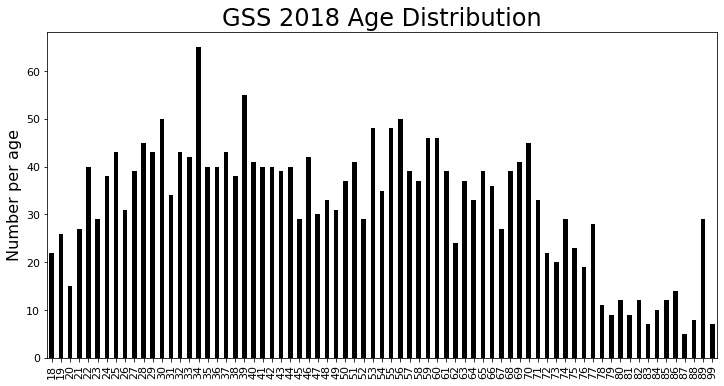

In [3]:
# Create a dictionary mapping key = age; value = age occurance
df_age = df["AGE"]
age_dict = {}
for person in range(len(df_age)):
    age = df.loc[person, "AGE"]
    if age not in age_dict:
        age_dict[age] = 0
    age_dict[age] += 1
age_dict_sorted = dict(sorted(age_dict.items()))

# plot_dict function from p9!
def plot_dict(d, label="Please Label Me!", title="Please Label Me!"):
    """plot_dict(d, label) creates a bar plot using the 
    dictionary 'd' and labels the y-axis as 'label'"""
    ax = pd.Series(d).sort_index().plot.bar(color="black", fontsize=11, figsize=(12, 6))
    ax.set_ylabel(label, fontsize=16)
    ax.set_title(title, fontsize=24)
    
# Plot age distribution
age_plot_2018 = plot_dict(age_dict_sorted, label = "Number per age", title = "GSS 2018 Age Distribution")
age_plot_2018

### Q2: What is the average age of the 2018 cohort?

In [4]:
mean_age_2018 = round(df["AGE"].mean(), 2)
mean_age_2018
stdev_age_2018 = round(df["AGE"].std(axis=None, skipna=True, level=None, ddof=1, numeric_only=None), 2)
stdev_age_2018
print("The 2018 cohorts average age is {} (stdev = {}). \
The age distribution is fairly uniformly distributed across the range."\
      .format(mean_age_2018, stdev_age_2018))

The 2018 cohorts average age is 49.12 (stdev = 18.24). The age distribution is fairly uniformly distributed across the range.


# SCIFROM vs SEEKSCI
The GSS **SCIFROM** indicator measures where respondants get their science and technology news (self-assessed). The **SEEKSCI** measures where respondants are most likey to *seek out* scienctific information.

These two measures are very similar, but differ in the underlying theory of information processing. **SCIFROM** implies a **passive** information processing mode, while **SEEKSCI** implies an **acive** processing mode. It is coded on the following scale:

| News source  | Code        | News Source |  Code       |
| -----------  | ----------- | ----------- | ----------- |
| Newspaper    | 1           | Family      | 8           |
| Magazines    | 2           | Friends     | 9           |
| The internet | 3           | Library     | 10          |
| Books/print  | 4           | Other       | 11          |
| TV           | 5           | Don't know  | 98          |
| Radio        | 6           | No answer   | 99          |
| Gov Agencies | 7           | N/A         | 0           |

Comparision between type of media and processing typology will be a comparison of interest for various measures of trust in science.

# Create dictionaries of dataframes for SCIFROM, SEEKSCI typologies

In [5]:
# Create dictionary for scifrom
scifrom_dict = {}
# Boolean index, map key to values: media, respondants
scifrom_dict["newspaper"] = df[df["SCIFROM"] == 1]
scifrom_dict["magazines"] = df[df["SCIFROM"] == 2]
scifrom_dict["internet"] = df[df["SCIFROM"] == 3]
scifrom_dict["books"] = df[df["SCIFROM"] == 4]
scifrom_dict["tv"] = df[df["SCIFROM"] == 5]
scifrom_dict["radio"] = df[df["SCIFROM"] == 6]
scifrom_dict["gov"] = df[df["SCIFROM"] == 7]
scifrom_dict["family"] = df[df["SCIFROM"] == 8]
scifrom_dict["friends"] = df[df["SCIFROM"] == 9]
scifrom_dict["library"] = df[df["SCIFROM"] == 10]

# Create dictionary for seeksci
seeksci_dict = {}
# Boolean index, map key to values: media, respondants
seeksci_dict["newspaper"] = df[df["SEEKSCI"] == 1]
seeksci_dict["magazines"] = df[df["SEEKSCI"] == 2]
seeksci_dict["internet"] = df[df["SEEKSCI"] == 3]
seeksci_dict["books"] = df[df["SEEKSCI"] == 4]
seeksci_dict["tv"] = df[df["SEEKSCI"] == 5]
seeksci_dict["radio"] = df[df["SEEKSCI"] == 6]
seeksci_dict["gov"] = df[df["SEEKSCI"] == 7]
seeksci_dict["family"] = df[df["SEEKSCI"] == 8]
seeksci_dict["friends"] = df[df["SEEKSCI"] == 9]
seeksci_dict["library"] = df[df["SEEKSCI"] == 10]

### Q3: What is the average age for each typology in SCIFROM and SEEKSCI?

#### SCIFROM age dict

In [6]:
# Create SCIFROM dict mapping media type to average age utilizing that type
scifrom_age_dict = {}
for source in scifrom_dict:
    scifrom_age_dict[source] = round(scifrom_dict[source]["AGE"].mean(), 2)
scifrom_age_dict

{'newspaper': 62.71,
 'magazines': 59.54,
 'internet': 42.88,
 'books': 61.22,
 'tv': 58.05,
 'radio': 50.76,
 'gov': 44.0,
 'family': 51.22,
 'friends': 44.39,
 'library': 39.33}

#### SEEKSCI age dict

In [7]:
# Create SEEKSCI dict mapping media type to average age utilizing that type
seeksci_age_dict = {}
for source in seeksci_dict:
    seeksci_age_dict[source] = round(seeksci_dict[source]["AGE"].mean(), 2)
seeksci_age_dict

{'newspaper': 64.89,
 'magazines': 61.92,
 'internet': 44.71,
 'books': 52.92,
 'tv': 62.23,
 'radio': 61.64,
 'gov': 47.7,
 'family': 58.82,
 'friends': 48.64,
 'library': 47.8}

### Q4: What media type has the highest and lowest average age for SEEKSCI?

In [8]:
ss_max_age_type = Series(seeksci_age_dict).idxmax()
ss_min_age_type = Series(seeksci_age_dict).idxmin()
ss_max_age = Series(seeksci_age_dict).max()
ss_min_age = Series(seeksci_age_dict).min()
print("The media type for science information seekers with the max average age is " \
      + "{}, average age {}. The minimum-age-media-type is {}, average age {}."\
      .format(ss_max_age_type, ss_max_age, ss_min_age_type, ss_min_age))

The media type for science information seekers with the max average age is newspaper, average age 64.89. The minimum-age-media-type is internet, average age 44.71.


**Conclusion:** age seems to be inversely associated with new media formats and positively corrlated with old media formats such as televison and magazines.

## Cultivation of attitudes towards scientists
Cultivation theory is a classic communications paradigm that states increased expsure to television will imbue audiences with the attitudes, themes and narratives present on television. Past content analyses have found that dipictions of scientists on television often portray them as eccentric oddballs (think Back to the Future, Rick and Morty, etc). There have been little studies of scientist portrayals on other media platforms.

Will those who get science informaton from TV think that scientists are oddballs more than other platforms? This metric is captured in the variable **SCIENTOD**. It is coded on the following likert scale:

**GSS Variable: Scientists are apt to be odd and peculiar people. Do you strongly agree, agree, disagree, or strongly disagree?**

| Likert Scale | Code        |
| -----------   | ----------- |
| Strongly Agree | 1           |
| Agree         | 2           |
| Disagree      | 3           |
| Strongly Disagree  | 4      |
| Don't know    | 8           |
| No answer     | 9           |

### Q5: For each media type what is the average likert score for belief in scientists as oddballs, which has the strongest belief?
Note: lower score = stronger belief. We use the variable scifrom instead of sciweek, as cultivation is based on passive media consumption.    

**Hypothesis:** Primary sci TV viewers will have stronger belief that scientists are oddballs than other media typologies

In [9]:
# remove 8, 9 responses
cleaned_oddball_dict = {}
for media_type in scifrom_dict:
    cleaned_oddball_dict[media_type] = \
    round(scifrom_dict[media_type]["SCIENTOD"][scifrom_dict[media_type]["SCIENTOD"]\
                                               < 5].mean(), 2)
cleaned_oddball_dict

{'newspaper': 2.7,
 'magazines': 2.48,
 'internet': 2.48,
 'books': 2.52,
 'tv': 2.37,
 'radio': 2.24,
 'gov': 2.5,
 'family': 2.5,
 'friends': 2.58,
 'library': 1.83}

In [10]:
Series(cleaned_oddball_dict).idxmin()

'library'

We hypothesize that TV would have a high belief in comparission to other typologies, and it does, the highest belief is that from the library, possible that science fiction novels instill this belief?

## Breaking down online science news sources
The **SCINEWS3** variable breaks down online science news sources to various sites and platforms, coded:

| Platform     | Code        | Platform.   |  Code       |
| -----------  | ----------- | ----------- | ----------- |
| eNewspaper   | 1           | other       | 10           |
| eMagazines   | 2           |search engine| 11           |
| Science site | 3           | news site     | 4          |
| eBooks/report| 5           |don't know|98|
| wikipedia    | 6           |no answer|99|
| gov site     | 7           |N/A|0|
| social media | 8           |       |           |

Create a subset of media_type_dict:

In [11]:
# Clean data (remove n/a, don't know, no answer)
online_news_df = df[(df["SCINEWS3"] > 0) & (df["SCINEWS3"] < 12)]



# Create dict of online typologies, key = SCINEWS3 response, values = all respondants with that response
online_typology_dict = {}
for i in range(1, 12):
    if i == 9 or i == 10:
        continue # no code equivalent
    online_typology_dict[i] = df[df["SCINEWS3"] == i]

### Is astrology scientific?
The **ASTROSCI**  variable measures weather or not an individual believes that astrology is scientific (it's not). At the same time, not all online media is created equally in terms of information quality. Social media is notoriously unmoderated and uncurated. We would expect this to produce more false beliefs about science, including the scientific veracity of astrology. Coded: 

| Scale | Code        |
| -----------   | ----------- |
| Very Scientific | 1           |
| Somewhat Scientific         | 2           |
| Not at all Scientific      | 3           |
| Don't know    | 8           |
| No answer     | 9           |
| N/A           | 0           |

### Q6: which online media typology most believes astrology is a scienfitic discipline?
lower score = belief that astrology is more scientific

In [12]:
# new dict: key = SCINEWS3 response, value = average ASTROSCI response for SCINEWS response
cleaned_astro_dict = {}
for online_type in online_typology_dict:
    if len(online_typology_dict[online_type]) < 20: # we exclude small sample size
        continue
    cleaned_astro_dict[online_type] = \
    round(online_typology_dict[online_type]["ASTROSCI"][online_typology_dict[online_type]["ASTROSCI"]\
                                               < 4].mean(), 2) #boolean index out "don't know", no answer
Series(cleaned_astro_dict).sort_values().head(1)


8    2.39
dtype: float64

Type 8 is social media, we see link between social media use and belief that astrology is a science. Still, these respondants average between not at all scientific and somewhat scientific.

### Q7: What proportion of people that get most of their science information from magazines believe that astrology is very scientific or somewhat scientific?

Rationale: horoscopes common in magazines,  though this question may assume science mag readership, methodology unclear!

In [13]:
# switch back to SCIFROM, proportion calculation of people answering 1 or 2 to ASCTROSCI for magazines
magazine_astrosci_prop = round(sum((scifrom_dict["magazines"]["ASTROSCI"] == 1) \
    | (scifrom_dict["magazines"]["ASTROSCI"] == 2))\
        / len(scifrom_dict["magazines"]), 2)
magazine_astrosci_prop

0.21

### Q8: Which media typology has the highest proportion of individuals who believe that astrology is very scientific or somewhat scientific??

In [14]:
# loop through SCIFROM DICT to calculate average ASCTROSCI response per media type, track max ASTROSCI
max_prop = None
max_type = None
for media in scifrom_dict:
    proportion_astrosci = round(sum((scifrom_dict[media]["ASTROSCI"] == 1) \
    | (scifrom_dict[media]["ASTROSCI"] == 2))\
        / len(scifrom_dict[media]), 2)
    if max_prop == None or max_prop < proportion_astrosci:
        max_prop = proportion_astrosci
        max_type = media
    print(media, proportion_astrosci)
max_type

newspaper 0.33
magazines 0.21
internet 0.39
books 0.35
tv 0.43
radio 0.29
gov 0.17
family 0.48
friends 0.55
library 0.33


'friends'

This makes sense! Friends (and second highest proportion family) are the real-life equivalent of social media!

### Q9: What is the relationship between age and beleif in astrology as a science?

In [15]:
# create a clean subset of data (remove n/a's, don't knows etc from astroci variable)

# recode age to decade
df["decade"] = df["AGE"] // 10 * 10
#group by decade
age_astro = df.groupby("decade")["ASTROSCI"]
#average each decade, sort
avg_age_astro = age_astro.mean().sort_index()

avg_age_astro

decade
10    1.375000
20    1.148571
30    1.280000
40    1.487671
50    1.317073
60    1.246537
70    1.598326
80    1.576271
90    3.000000
Name: ASTROSCI, dtype: float64

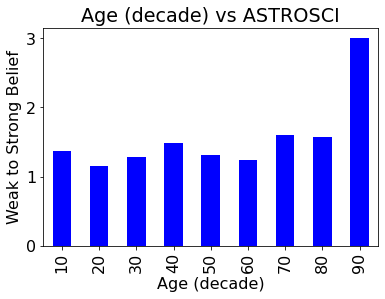

In [16]:
# Plot decade vs astrosci belief
ax = avg_age_astro.plot.bar(color = "b")
ax.set_title("Age (decade) vs ASTROSCI")
ax.set_ylabel("Weak to Strong Belief")
ax.set_xlabel("Age (decade)")
None

In [17]:
# Create a dataset without N/A, Null, Don't Know responses for ASTROSCI
df_astro_clean = df[(df["ASTROSCI"] != 0) & (df["ASTROSCI"] != 8) & (df["ASTROSCI"] != 9)]
# Calculate correlation between age and astrosci
age_astro_corr = round(df_astro_clean.corr()["AGE"]["ASTROSCI"], 3)
age_astro_corr

0.149

**Conclusion:** here we see a slight corrleation between age and belief that astrology is a science.

In [18]:
# count number of individuals per decade, can also see distribution above
df["decade"].value_counts().sort_index()

10     48
20    350
30    450
40    365
50    410
60    361
70    239
80    118
90      7
Name: decade, dtype: int64

The 90-decade abberation likely due to low sample size (7 responses)

## Q10: Create a database containing the 2018 GSS and 2021 GSS data
### Establish a connection

In [19]:
# Create new database, open connection
if os.path.exists("gss.db") == False:
    Path('gss.db').touch()
    conn = sqlite3.connect('gss.db')
    c = conn.cursor() ##c = sqlite3.connect(movies_path) - ASK ABOUT THIS, ERROR Below


    # read csv's into python pandas
    data_2018 = pd.read_csv("GSS2018.csv")
    data_2021 = pd.read_csv("gss2021.csv")

    data_2018.to_sql('data_2018', conn, if_exists = 'append', index = 'false')
    c.execute('''SELECT * FROM data_2018''').fetchall()

    data_2021.to_sql('data_2021', conn, if_exists = 'append', index = 'false')
    c.execute('''SELECT * FROM data_2021''').fetchall()
# if db exists, establish a connection
else:
    conn = sqlite3.connect("gss.db")

In [20]:
pd.read_sql("SELECT * FROM sqlite_master WHERE type='table'", conn)

,type,name,tbl_name,rootpage,sql
0,table,data_2018,data_2018,2,"CREATE TABLE ""data_2018"" (\n""false"" INTEGER,\n..."
1,table,data_2021,data_2021,1193,"CREATE TABLE ""data_2021"" (\n""false"" INTEGER,\n..."


In [21]:
pd.read_sql("select * from data_2018", conn)

,false,ABANY,ABDEFECT,ABFELEGL,ABHELP1,ABHELP2,ABHELP3,ABHELP4,ABHLTH,ABINSPAY,...,XMARSEX,XMARSEX1,XMOVIE,XNORCSIZ,YEAR,YEARSJOB,YEARSUSA,YEARVAL,YOUSUP,ZODIAC
0,0,2,1,0,1,1,1,1,1,1,...,1,1,0,6,2018,1.0,-1,-1.0,45,6
1,1,1,1,3,2,2,2,2,1,2,...,1,0,2,6,2018,-1.0,-1,-1.0,0,11
2,2,0,0,0,1,2,1,1,0,2,...,0,1,2,6,2018,15.0,-1,-1.0,3,1
3,3,0,0,1,1,1,1,1,0,1,...,0,0,2,6,2018,25.0,-1,-1.0,10,1
4,4,2,1,0,2,2,2,1,1,2,...,1,0,2,6,2018,-1.0,-1,-1.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4691,2343,1,1,3,9,9,9,9,1,9,...,1,1,0,10,2018,2.0,-1,-1.0,0,5
4692,2344,2,1,3,1,2,1,1,1,1,...,1,1,0,10,2018,2.0,-1,-1.0,1,9
4693,2345,2,1,3,1,2,2,1,1,1,...,1,0,2,10,2018,-1.0,-1,-1.0,0,99
4694,2346,0,0,0,2,2,2,1,0,1,...,0,1,2,10,2018,-1.0,-1,-1.0,0,2


In [22]:
pd.read_sql("select * from data_2021", conn)

,false,Unnamed: 0,year,id,wrkslf,wrkgovt,occ10,prestg10,indus10,marital,...,relitennv,biblenv,postlifenv,kidssolnv,uscitznnv,fucitznnv,fepolnv,scibnftsv,abanyg,fileversion
0,0,0,2021,1,someone else,None,receptionists and information clerks,38.0,offices of dentists,married,...,not very strong,inspired word,no,somewhat worse,None,None,None,about equal (phone mode only: volunteered),no,7221.3
1,1,1,2021,2,someone else,None,advertising and promotions managers,57.0,advertising and related services,divorced,...,no religion,None,None,None,None,None,None,benefits greater,None,7221.3
2,2,2,2021,3,someone else,None,miscellaneous assemblers and fabricators,35.0,furniture and home furnishings stores,never married,...,None,None,None,None,None,None,disagree,None,yes,7221.3
3,3,3,2021,4,self-employed,None,childcare workers,35.0,child day care services,widowed,...,None,None,None,None,None,None,None,None,None,7221.3
4,4,4,2021,6,someone else,None,insurance claims and policy processing clerks,38.0,insurance carriers and related activities,never married,...,not very strong,inspired word,yes,None,a u.s. citizen,None,disagree,None,yes,7221.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8059,4027,4027,2021,4467,None,None,None,NaN,None,never married,...,not very strong,ancient book,yes,None,None,None,disagree,None,yes,7221.3
8060,4028,4028,2021,4468,someone else,None,customer service representatives,31.0,electronic shopping,married,...,None,None,None,None,None,None,None,None,None,7221.3
8061,4029,4029,2021,4469,someone else,None,"managers, all other",39.0,pharmaceutical and medicine manufacturing,married,...,None,None,None,None,None,None,None,benefits greater,None,7221.3
8062,4030,4030,2021,4470,someone else,None,secondary school teachers,64.0,elementary and secondary schools,divorced,...,None,inspired word,yes,None,None,None,disagree,None,yes,7221.3


In [23]:
# this function allows to type less for each query, source = lecture
def qry(sql):
    return pd.read_sql(sql, conn)

## NATHEAL: National Health Spending Sentiment
Science issues such as health and the enviroment are becoming increasingly polarized. For this analysis, we take the NATHEAL varible, which measures participant sentiment towards national health spending, scored as "too little", "just right", and "too much".

### Q11: Do more Clinton or Trump voters think that the US spends too little on national healthcare?

In [24]:
# query to grap natheal 'too little' responses grouped by presidental candidate from 2021
pol_natheal_df = qry("""
    SELECT pres16,
        sum(case when natheal = 'too little' then 1 else 0 end) AS too_little_total,
        COUNT(*) AS total
    FROM data_2021
GROUP BY pres16
""")
# Create a percent column
pol_natheal_df["perc_too_little"] = pol_natheal_df["too_little_total"] / pol_natheal_df["total"] * 100
# Sort output by percent column
pol_natheal_df.sort_values("perc_too_little", ascending = False)

,pres16,too_little_total,total,perc_too_little
1,clinton,1254,3018,41.550696
2,didn't vote for president,36,98,36.734694
3,other candidate,114,338,33.727811
0,None,834,2536,32.886435
4,trump,390,2074,18.804243


Here we see that:
- 41% of Clinton voters think that the US spends too little on healthcare
- 19 % of Trump voters think that the US spends too little on healthcare
- **CLEARLY** There is a poltical divide on healthcare spending.
Lets explore the relationship between health, science and public perception and opinion more by adding a temporal element, cross referencing the 2021 survey with 2018's results.

## NATHEALTH X INDUS10
Before we get into longitudunal pandemic analyses, lets first look at how the NATHEALTH variable plays out across occupational industries. There has been a lot of talk of essentail workers - workers who interface heavily with the public in their day-to-day job, requried to keep the nations economy running and provide essential services such as healthcare, education, and food service, etc.

Hypothesis: these people have first hand experience of the pandemics brutality, and likely won't think the US sends enough on healthcare infrastructure.

### Q12: Which industries (over 100 observations) have the highest proportion of people who think the US could spend more on healthcare?

In [25]:
# sum/case code adapted from https://stackoverflow.com/questions/12789396/how-to-get-multiple-counts-with-one-sql-query
# query to pull natheal 'too little' responses grouped by industry
indus_too_little_df = qry("""
SELECT indus10,
    COUNT(*) AS total,
    sum(case when natheal = 'too little' then 1 else 0 end) AS too_little_total
FROM data_2021
GROUP BY indus10
HAVING total > 100
""")
# create a percent column
indus_too_little_df["prop_too_little"] = indus_too_little_df["too_little_total"] \
    / indus_too_little_df["total"]
#Sort descending
indus_too_little_df.sort_values("prop_too_little", ascending = False)

,indus10,total,too_little_total,prop_too_little
13,outpatient care centers,106,46,0.433962
6,executive offices and legislative bodies,112,48,0.428571
7,grocery stores,108,44,0.407407
0,None,400,162,0.405000
15,restaurants and other food services,316,114,0.360759
14,real estate,150,54,0.360000
9,insurance carriers and related activities,168,58,0.345238
5,elementary and secondary schools,650,224,0.344615
12,other health care services,124,42,0.338710
1,banking and related activities,130,42,0.323077


### Q13: Lets look more specifically at the food serivce industry, which occupations within this industry believe that the US should spend more on healthcare?

NATHEAL = "too little"

In [26]:
# Run SQL query, count natheal "too little" responses grouped by occupation in food service industry
food_serv_health_df = qry("""
SELECT occ10,
    COUNT(*) AS total,
    sum(case when natheal = 'too little' then 1 else 0 end) AS too_little_total
FROM data_2021
WHERE indus10 = "restaurants and other food services"
GROUP BY occ10
HAVING total >= 10
""")
food_serv_health_df["percentage"] = food_serv_health_df["too_little_total"] \
    / food_serv_health_df["total"] * 100
food_serv_health_df.sort_values("percentage", ascending = False)

,occ10,total,too_little_total,percentage
2,chefs and head cooks,14,8,57.142857
4,cooks,56,30,53.571429
6,first-line supervisors of food preparation and...,16,8,50.000000
7,food preparation workers,20,10,50.000000
0,bartenders,22,10,45.454545
1,cashiers,20,8,40.000000
9,waiters and waitresses,64,20,31.250000
8,food service managers,38,10,26.315789
5,dishwashers,10,2,20.000000
3,"combined food preparation and serving workers,...",12,0,0.000000


**Conclusion:** Interestingly, for the food serivce industry, those occupations with a lower public interface have a higher sentiment that there is too little spending on healthcare. This goes against what was expected -- that roles like servers and bartenders, who directly interact with many members of the public, would have a higher sentiment that the goverment doesn't spend enough on healthcare.

Now, lets compare the 2021 industries, with pre-pandemic industries, same natheal variable, looking at those who responded "too little".

### Q14: Which industries (over 100 observations) have the highest proportion of people who think the US could spend more on healthcare?

In [27]:
indus_too_little_df_2018 = qry("""
SELECT indus10,
    COUNT(*) AS total,
    sum(case when natheal = 1 then 1 else 0 end) AS too_little_total
FROM data_2018
GROUP BY indus10
HAVING total > 100
""")
indus_too_little_df_2018["prop_too_little"] = indus_too_little_df_2018["too_little_total"] \
    / indus_too_little_df_2018["total"]
indus_too_little_df_2018.sort_values("prop_too_little", ascending = False)

,INDUS10,total,too_little_total,prop_too_little
4,7870,112,52,0.464286
5,8190,240,100,0.416667
2,6990,112,46,0.410714
3,7860,320,124,0.387500
0,0,154,58,0.376623
6,8680,256,88,0.343750
1,770,276,74,0.268116


The 2018 data is numberically coded, the GSS uses the U.S. Bureau of the Census occupation (2010) and industry codes to code indus10, here we uncode the output:

| Code | Industry        |
| -----------   | ----------- |
| 7870 | Colleges and Universities |
| 8190        | Hospitals |
| 6990     | Insurance           |
| 7860    | Educational Services           |
| 8680     | Food services and drinking places           |
| 770   | Construction           |

Overall, we see many of the same industries represented: education, health, and food service industries. However, there appears to be an across the board jump in people who think that the US spends "too little" on healthcare from pre-to-post-covid, 2018-2021. About a 10% bump in sentiment across the board.

Next, lets look at the raw numbers for the NATHEAL variable across these two years:

### Q15: How many respondants thought that the goverment is spending "too little", "about right" and "too much" on national healthcare in 2018 and 2021?

In [28]:
# 2018 Natheal count query
natheal_2018 = qry("""
SELECT natheal, COUNT(natheal) AS Natheal_2018
FROM data_2018
WHERE natheal = 1 OR natheal = 2 OR natheal = 3
GROUP BY natheal 
""")
# Recode natheal numerics
natheal_2018["NATHEAL"][0] = "too little"
natheal_2018["NATHEAL"][1] = "about right"
natheal_2018["NATHEAL"][2] = "too much"
natheal_2018 = natheal_2018.set_index("NATHEAL")
natheal_2018

,Natheal_2018
NATHEAL,
too little,1678
about right,518
too much,116


In [29]:
# 2021 Natheal count query
natheal_2021 = qry("""
SELECT natheal, COUNT(natheal) AS Natheal_2021
FROM data_2021
WHERE 0 < natheal < 4
GROUP BY natheal 
""")
natheal_2021 = natheal_2021.sort_values("Natheal_2021", \
                    ascending = False).set_index("natheal")
natheal_2021

,Natheal_2021
natheal,
too little,2628
about right,966
too much,338


### Q:16 How does NATHEAL sentiment differ from 2018 to 2021?

In [30]:
# Create new df with combinde data, first add 2021 data
natheal_df = natheal_2021
# second, add 2018 data to new dataframe
natheal_df["Natheal_2018"] = natheal_2018["Natheal_2018"]

# Create percentage columns for each year
natheal_df["percent_2018"] = (natheal_df["Natheal_2018"] / natheal_df["Natheal_2018"].sum()) * 100
natheal_df["percent_2021"] = (natheal_df["Natheal_2021"] / natheal_df["Natheal_2021"].sum()) * 100

natheal_df

,Natheal_2021,Natheal_2018,percent_2018,percent_2021
natheal,,,,
too little,2628,1678,72.577855,66.836216
about right,966,518,22.404844,24.567650
too much,338,116,5.017301,8.596134


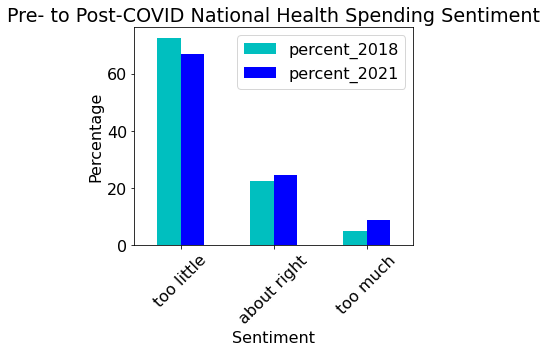

In [31]:
ax = natheal_df[["percent_2018", "percent_2021"]].plot.bar(color = ["c", "b"], figsize = (5, 4))
ax.set_xlabel("Sentiment")
ax.set_ylabel("Percentage")
ax.set_title("Pre- to Post-COVID National Health Spending Sentiment")
ax.set_xticklabels(list(natheal_df.index), rotation = 45)
ax
None

**Conclusion:** It seems that sentiment about national healthcare spending has shifted from "too little" towards "too much" 2018 to 2021. This finding is at odds with our earlier results on perceptions of industry workers that showed those industries with a high percentage of workers who felt that the goverment was spending too little saw an increase in the sentiment over the pandemic. Two hypothesis for these divergent results:

- Views have become polarized in industries with a high pubic interface

- Public-facing roles experienced an increase in "too little" sentiment due to the nature of their work, while the increased goverment spending (PPP, vaccines, etc) during the pandemic resulted in the opposite for the majority to respondants.

Still, an interesting finding!

### HLTHMENTL -Self-Assessed Mental Health Ratings

[Many Studies](https://www.thelancet.com/journals/lanpsy/article/PIIS2215-0366(20)30462-4/fulltext) have found that the pandemic has had a significant impact on mental health. We can test this by comparing the 2018 mental health self-assessments with 2021 assessments post-pandemic. If we see this trend, it will give the GSS data as well as other studies increased validity. We reproduce results and findings.

Begin by creating DataFrames from SQL queries for both 2018 and 2021

In [32]:
# Here we SQL query, we recode using new method found here: https://dba.stackexchange.com/questions/143056/how-do-i-replace-values-in-column-after-querying
mental_health_2018 = qry("""
SELECT
CASE 
    WHEN HLTHMNTL = 1 THEN 'excellent'
    WHEN HLTHMNTL = 2 THEN 'very good'
    WHEN HLTHMNTL = 3 THEN 'good'
    WHEN HLTHMNTL = 4 THEN 'fair'
    WHEN HLTHMNTL = 5 THEN 'poor'
    WHEN HLTHMNTL = 8 OR HLTHMNTL = 9  THEN Null

END AS HLTHMNTL, COUNT(HLTHMNTL) AS number_2018
FROM data_2018
GROUP BY HLTHMNTL
""")
# Set index to mental health
mental_health_2018 = mental_health_2018.set_index("HLTHMNTL")
# Remove N/A's or Null values
mental_health_2018 = mental_health_2018.loc[["excellent", "very good", "good", "fair", "poor"]]
mental_health_2018["percent_2018"] = round((mental_health_2018["number_2018"] / mental_health_2018["number_2018"].sum()) * 100, 2)
mental_health_2018

,number_2018,percent_2018
HLTHMNTL,,
excellent,956,20.52
very good,1810,38.86
good,1342,28.81
fair,464,9.96
poor,86,1.85


In [33]:
# Repeat for 2021
mental_health_2021 = qry("""
SELECT HLTHMNTL, COUNT(HLTHMNTL) AS number_2021
FROM data_2021
GROUP BY HLTHMNTL
""")
# Set index to mental health
mental_health_2021 = mental_health_2021.set_index("hlthmntl")
# Remove N/A's or Null values
mental_health_2021 = mental_health_2021.loc[["excellent", "very good", "good", "fair", "poor"]]
mental_health_2021["percent_2021"] = round((mental_health_2021["number_2021"] / mental_health_2021["number_2021"].sum()) * 100, 2)
mental_health_2021

,number_2021,percent_2021
hlthmntl,,
excellent,1158,15.92
very good,2626,36.10
good,2294,31.54
fair,952,13.09
poor,244,3.35


### Q18: What percent of individuals rated their mental health as excellent in 2018?

In [34]:
excellent_mh_2018 = mental_health_2018.loc["excellent"]["percent_2018"]
excellent_mh_2018

20.52

### Q19: What percent of individuals rated their mental health as excellent in 2021?


In [35]:
excellent_mh_2021 = mental_health_2021.loc["excellent"]["percent_2021"]
print(excellent_mh_2021)
print("From 2018 to 2021, there was a {} precent change in excellent mental health self-assessments."\
      .format(excellent_mh_2021 - excellent_mh_2018))

15.92
From 2018 to 2021, there was a -4.6 precent change in excellent mental health self-assessments.


### Plot the mental healt assessments from both years!

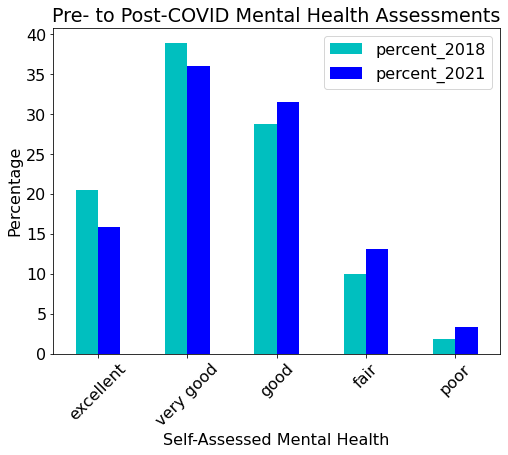

In [36]:
# Create a dataframe with both percentages

mh_df1 = mental_health_2018
mh_df1["percent_2021"] = mental_health_2021["percent_2021"]

# Create a double bar graph
ax = mh_df1[["percent_2018", "percent_2021"]].plot.bar(color = ["c", "b"], \
                                                       figsize = (8,6))
ax.set_xlabel("Self-Assessed Mental Health")
ax.set_ylabel("Percentage")
ax.set_title("Pre- to Post-COVID Mental Health Assessments")
ax.set_xticklabels(list(mh_df1.index), rotation = 45, color = "k",)
None

**Conclusion:** we see a slight shift from excellent and very good to good, fair, and poor self-assessments of mental health. This is consistnat with other sources and reserch that has found the pandemic has negatively affected the mental health of much of the population in some way or another. I would be interested to see how this graph would change in the 2024 survey, would it rebound or continue this trajectory?

## WWWHR - Hours per week of internet consumption
People were shut indoors during the pandemic and many picked up online hobbies such as gaming, socialization with friends over zoom, etc. Has this nessessity during the pandemic become habit? Additionally, increased internet use, especially social media, has been linked to mental health crises in adolescent girls. A future analysis could compare time spend online vs mental health rating

In [37]:
# Pull age as decade, time spend online, clean data, group by decade
age_group_web_use_df = qry("""
SELECT FLOOR(age / 10) * 10 AS decade, AVG(wwwhr) AS Time_Online_2018
FROM data_2018
WHERE age != "None" AND wwwhr != "None" AND wwwhr < 998 AND wwwhr > 0
GROUP BY Decade
""")

# Pull age as decade, time spend online, clean data, group by decade
age_group_web_use_df[["decade_2021", "Time_Online_2021"]] = qry("""
SELECT FLOOR(age / 10) * 10 AS Decade, AVG(wwwhr)
FROM data_2021
WHERE age != "None" AND wwwhr != "None" AND wwwhr < 998 AND wwwhr > 0
GROUP BY Decade
""")

age_group_web_use_df.set_index("decade")

,Time_Online_2018,decade_2021,Time_Online_2021
decade,,,
10,19.392857,10.0,23.200000
20,21.237374,20.0,24.493776
30,18.980843,30.0,17.056098
40,12.879828,40.0,16.420655
50,13.347826,50.0,14.485577
60,10.681564,60.0,11.373102
70,8.673267,70.0,9.969283
80,10.000000,80.0,9.112245
90,14.833333,NaN,NaN


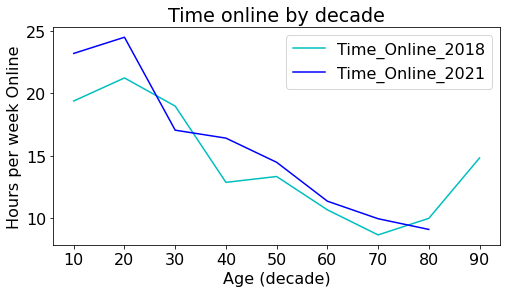

In [38]:
# Create a line plot with both year's data
decade_online_graph = age_group_web_use_df.plot.line(x = "decade", \
                                                     y = ["Time_Online_2018", "Time_Online_2021"], \
                                                     figsize = (8, 4), color = ["c", "b"])
decade_online_graph.set_title("Time online by decade")
decade_online_graph.set_xlabel("Age (decade)")
decade_online_graph.set_ylabel("Hours per week Online")
None

- Overall, we see slightly elevated levels of time online in 2021 compared with 2018. Possible that people have continued online habits? Would help to look at past years to dermine if this has been an ongoing trend.
- We also see that younger adults spend more time online than older adults, a finding consistent with our SEEKSCI analysis


In [39]:
mh_online_df = qry("""
SELECT DISTINCT(HLTHMNTL), AVG(wwwhr) AS online_2018, 
CASE 
    WHEN HLTHMNTL = 1 THEN 'excellent'
    WHEN HLTHMNTL = 2 THEN 'very good'
    WHEN HLTHMNTL = 3 THEN 'good'
    WHEN HLTHMNTL = 4 THEN 'fair'
    WHEN HLTHMNTL = 5 THEN 'poor'
    WHEN HLTHMNTL = 8 OR HLTHMNTL = 9  THEN Null

END AS HLTHMNTL1
FROM data_2018
WHERE wwwhr != "None" AND wwwhr < 998 AND wwwhr > 0
GROUP BY HLTHMNTL1
ORDER BY HLTHMNTL1
""")
mh_online_df.set_index("HLTHMNTL")
mh_online_df[["rating", "online_2021"]] = qry("""
SELECT DISTINCT(HLTHMNTL), AVG(wwwhr)
FROM data_2021
WHERE wwwhr != "None" AND wwwhr < 998 AND wwwhr > 0
GROUP BY HLTHMNTL
ORDER BY HLTHMNTL
""")
# set index to rating, sort by coded mental health already in asc order, index out None responseex
mh_online_df_clean = mh_online_df.set_index("rating").sort_values(by = "HLTHMNTL")[:-1]
mh_online_df_clean

,HLTHMNTL,online_2018,HLTHMNTL1,online_2021
rating,,,,
excellent,1,14.027778,excellent,14.383978
very good,2,14.651838,very good,13.869565
good,3,14.110169,good,15.186080
fair,4,18.522124,fair,17.287197
poor,5,28.238095,poor,23.101449


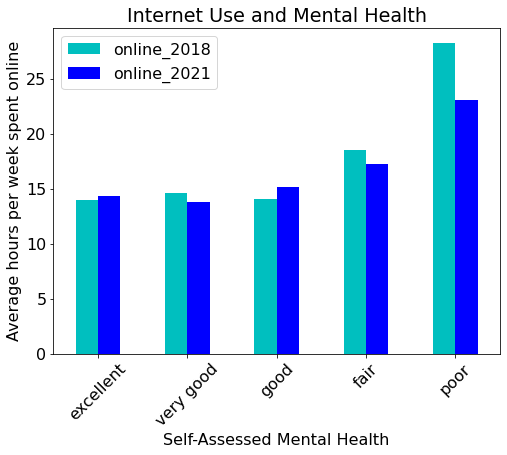

In [42]:
ax = mh_online_df_clean[["online_2018", "online_2021"]].plot.bar(color = ["c", "b"], \
                                                       figsize = (8,6))
ax.set_xlabel("Self-Assessed Mental Health")
ax.set_ylabel("Average hours per week spent online")
ax.set_title("Internet Use and Mental Health")
ax.set_xticklabels(list(mh_online_df_clean["HLTHMNTL1"]), rotation = 45, color = "k",)
None

**Conclusion** We see a corrleation with time spent online and poor mental health ratings. This may have been part of the driver for decreasing mental health over the pandemic as people spent more time online. Interestingly, we see that the proportion of poor ratings/time spent online is less in 2021 than in 2018. Is it possible that the activities being conducted online have shifted to more social activies, brining some well-being? Would need more study.

In [41]:
conn.close()